<a href="https://colab.research.google.com/github/tacerihsehc613/ML-board/blob/main/PracticalLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset and info found at the website
# https://archive.ics.uci.edu/ml/datasets/car+evaluation

import pandas as pd
!wget https://raw.githubusercontent.com/MarkusSagen/ML-datasets/master/cars_data.csv 
df = pd.read_csv('cars_data.csv', index_col=0)

--2022-03-17 20:35:53--  https://raw.githubusercontent.com/MarkusSagen/ML-datasets/master/cars_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59410 (58K) [text/plain]
Saving to: ‘cars_data.csv.1’

cars_data.csv.1     100%[===================>]  58.02K  --.-KB/s    in 0.02s   

2022-03-17 20:35:54 (2.96 MB/s) - ‘cars_data.csv.1’ saved [59410/59410]



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Helper to print with prettier colors
class c:
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    END = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
print(f"Printing {c.PURPLE}with {c.GREEN}pretty {c.FAIL}colors{c.END}{c.BOLD}!{c.END}")

Printing with pretty colors!


In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,NaN,2,small,low,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
len(df)

1728

In [ ]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

df.columns = column_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,NaN,2,small,low,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
nan_values_per_feature = df.isnull().sum()
nan_total = sum(list(df.isnull().sum()))

print(f"The dataset length: \t\t{c.BLUE}{len(df)}{c.END}")
print(f"Total number of missing values: {c.BOLD}{nan_total}{c.END}\n")

print(f"{c.BOLD}Printing how many entries in each column contain no NaN values{c.END}:")
df.info()
print(list(df.isnull().sum()))
print(df.isnull())

The dataset length: 		1728
Total number of missing values: 8

Printing how many entries in each column contain no NaN values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1725 non-null   object
 1   maint     1728 non-null   object
 2   doors     1723 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB
[3, 0, 5, 0, 0, 0, 0]
      buying  maint  doors  persons  lug_boot  safety  class
0      False  False  False    False     False   False  False
1      False  False  False    False     False   False  False
2      False  False   True    False     False   False  False
3      False  False  False    False     False   False  False
4      False  False  False    False     False   False  Fa

In [ ]:
df=df.dropna(axis='rows')

In [ ]:
print("List all attributes in the dataset and count how many entries of each kind\n")
for col in column_names:
    print(f"{c.BOLD}{col}:{c.END}")
    print(f"{df[col].value_counts()}")
    print()

List all attributes in the dataset and count how many entries of each kind

buying:
high     432
med      431
low      430
vhigh    428
Name: buying, dtype: int64

maint:
med      432
low      431
high     430
vhigh    428
Name: maint, dtype: int64

doors:
5more    432
4        431
2        430
3        428
Name: doors, dtype: int64

persons:
more    575
2       574
4       572
Name: persons, dtype: int64

lug_boot:
small    574
med      574
big      573
Name: lug_boot, dtype: int64

safety:
low     574
med     574
high    573
Name: safety, dtype: int64

class:
unacc    1205
acc       382
good       69
vgood      65
Name: class, dtype: int64



In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
buying_map = {
    'low' : 1,
    'med' : 2,
    'high' : 3,
    'vhigh' : 4
}
maint_map = {
    'low' : 1,
    'med' : 2,
    'high' : 3,
    'vhigh' : 4
}
doors_map = {
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5more' : 5
}
persons_map = {
    '2' : 2,
    '4' : 4,
    'more' : 5
}
lug_boot_map = {
    'small' : 1,
    'med' : 2,
    'big' : 3
}
safety_map = {
    'low' : 1,
    'med' : 2,
    'high' : 3
}
class_map = {
    'unacc' : 1,
    'acc' : 2,
    'good' : 3,
    'vgood' : 4
}
buying_data = df['buying'].map(buying_map)
maint_data = df['maint'].map(maint_map)
doors_data = df['doors'].map(doors_map)
persons_data = df['persons'].map(persons_map)
lug_boot_data = df['lug_boot'].map(lug_boot_map)
safety_data = df['safety'].map(safety_map)
class_data = df['class'].map(class_map)

df['buying'] = buying_data
df['maint'] = maint_data
df['doors'] = doors_data
df['persons'] = persons_data
df['lug_boot'] = lug_boot_data
df['safety'] = safety_data
df['class'] = class_data

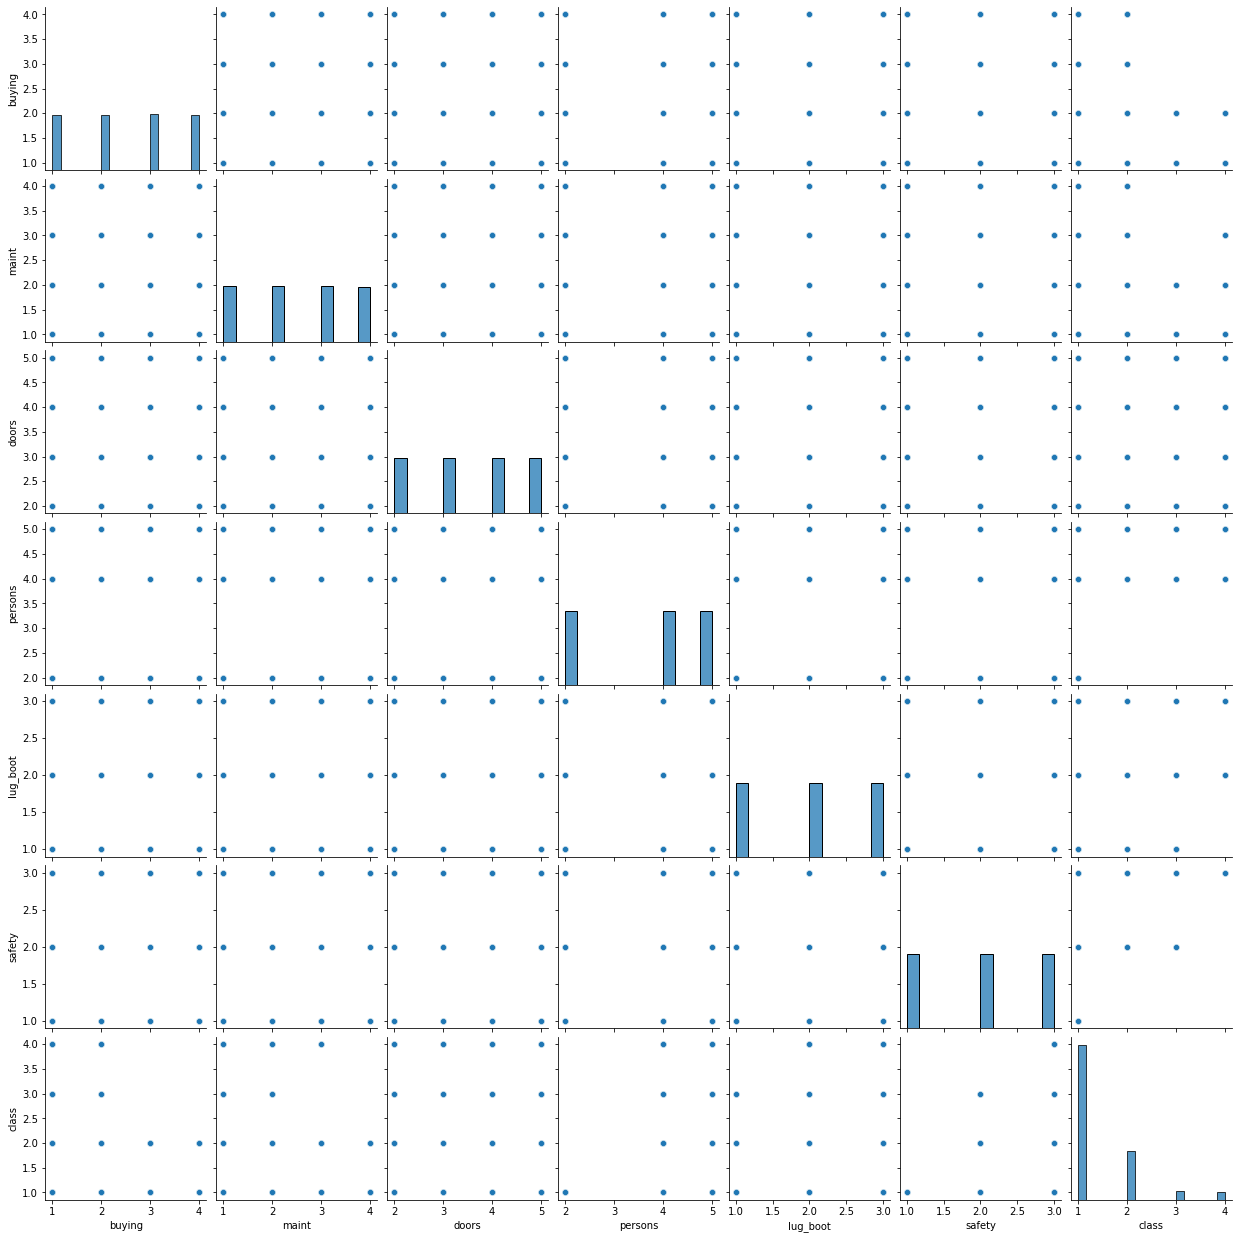

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].to_numpy() 
y=df.iloc[:,[-1]].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(X,y,test_size=.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
#lr.fit(train_input, train_target)
#print(lr.predict(train_scaled[:5]))
#print(lr.score(test_scaled,test_target))
acc=lr.score(test_scaled,test_target)# CODE PROVIDED TO TEST YOUR MODEL
assert 0.7 <= acc <= 0.95, "Your train/split division have too much data in the train or test set\
                            \nTry to change the division to create a more balanced model"

print(f"The trained model has an accuracy of: {100*acc:.2f}")

The trained model has an accuracy of: 83.76


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#('svc', SVC(gamma='auto'))])

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# 교차 검증을 할 때 훈련 세트를 섞기 위해 splitter 지정
splitter=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_validate(clf,X,y,cv=splitter)
print(np.mean(scores['test_score']))

0.9715284312407579


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X,y)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

splitter=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_validate(dt,X,y,cv=splitter)
print(np.mean(scores['test_score']))

0.9802392794730475


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf.fit(X,y)
scores=cross_validate(rf,X,y,cv=splitter)
print(np.mean(scores['test_score']))

0.9848938029305014


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
X=df.iloc[:,:-1]
y=df.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.8)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1,random_state=42)
clf.fit(X_train, y_train)

#splitter=StratifiedKFold(n_splits=2,shuffle=True,random_state=42)
scores=cross_validate(clf,X,y,cv=20)
acc=np.mean(scores['test_score'])

assert 0.9 <= acc <= 0.96, "The train/test split should be (20/80)"
print(f"The model accuracy is: {c.BOLD}{acc:.2f}{c.END}")

The model accuracy is: 0.95


In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

persons     0.265098
safety      0.249716
buying      0.153321
maint       0.148179
lug_boot    0.095228
doors       0.088457
dtype: float64

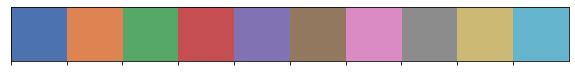

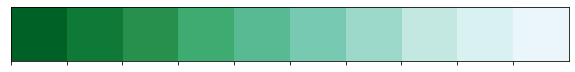

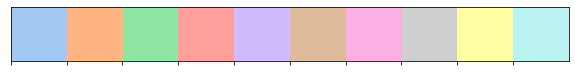

In [ ]:
# We can choose different color schemes when plotting
import seaborn as sns
sns.palplot(sns.color_palette("deep"))
sns.palplot(sns.color_palette("BuGn_r", 10)) 
sns.palplot(sns.color_palette("pastel"))

# Set the color palette we want to use
sns.set_palette('BuGn_r', n_colors=7)

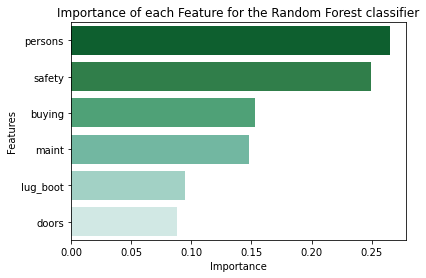

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

X_train_new = X_train.drop(['doors'], axis=1)
X_test_new = X_test.drop(['doors'], axis=1)


clf.fit(X_train_new, y_train)
pred = clf.predict(X_test_new)
acc = accuracy_score(y_test, pred)
print(f"The accuracy after dropping one of the feature is now: {c.BOLD}{acc:.2f}{c.END}")

The accuracy after dropping one of the feature is now: 0.93


In [ ]:
!pip install numpy

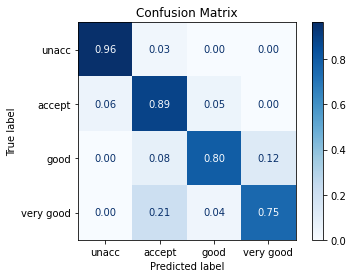

In [ ]:
# Helper function to check if the Scikit-learn package contains the confusion plot library
from re import split
import sklearn
if (int(sklearn.__version__.split('.')[1]) < 22):
    if 'google.colab' in str(get_ipython()):
      # Updating Scikit-learn on Google Colab
      !pip install -U scikit-learn
    else:
        # Updating Scikit-learn in your Anaconda enviroment
        !conda update conda -y 
        !pip install -U scikit-learn



# Plot confusion matrix of how the classifier made its predictions
from sklearn.metrics import plot_confusion_matrix
car_condition = ['unacc', 'accept', 'good', 'very good']


conf_matrix = plot_confusion_matrix(clf, X_test_new, y_test,
                            display_labels=car_condition,
                            cmap=plt.cm.Blues,
                            values_format='.2f',
                            normalize='true'); # Set to None to show the actual numbers


conf_matrix.ax_.set_title("Confusion Matrix");
plt.show()